In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("Advertising.csv")
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [34]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [35]:
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [36]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


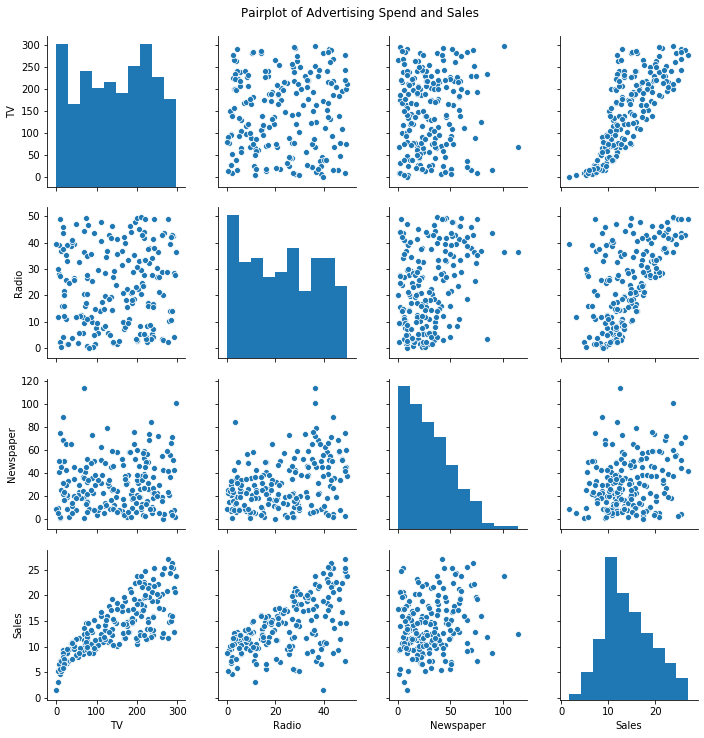

In [37]:
sns.pairplot(df)
plt.suptitle("Pairplot of Advertising Spend and Sales", y=1.02)
plt.show()

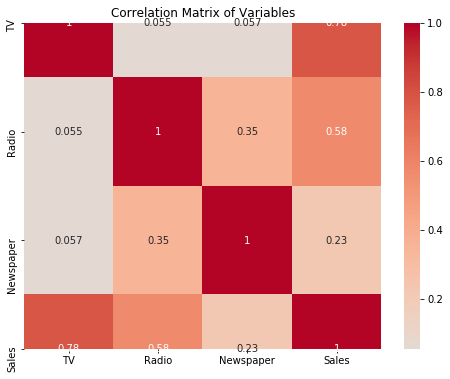

In [38]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Variables")
plt.show()

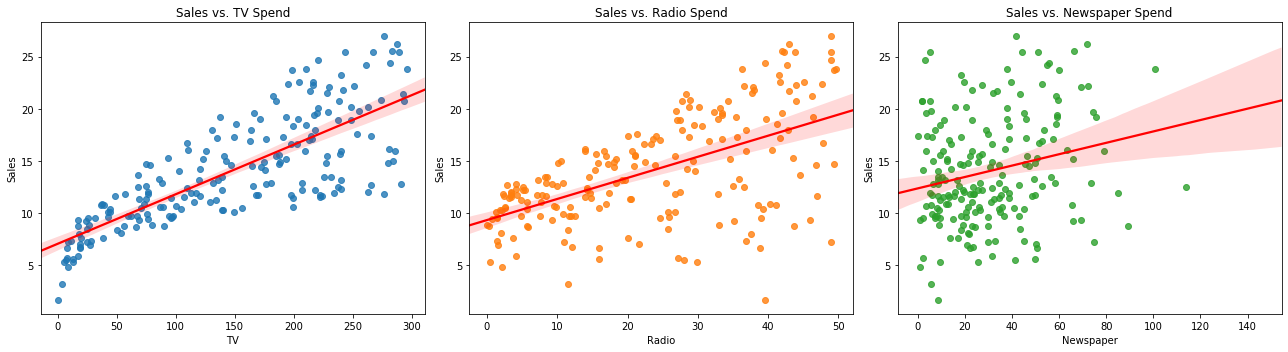

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
channels = ['TV', 'Radio', 'Newspaper']
for i, channel in enumerate(channels):
    sns.regplot(x=df[channel], y=df['Sales'], ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'Sales vs. {channel} Spend')
plt.tight_layout()
plt.show()

In [40]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (160, 3)
Testing set size: (40, 3)


In [44]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [45]:
Y_pred = model.predict(X_test)
# 8. Predict Future Sales (Scenario Analysis)
print(f"\nPredicting Sales for New Marketing Scenarios:")
print("Scenario 1: High TV & Radio, Low Newspaper")
new_scenario_1 = pd.DataFrame({'TV': [300], 'Radio': [50], 'Newspaper': [10]})
prediction_1 = model.predict(new_scenario_1)
print(f"  Predicted Sales: {prediction_1[0]:.1f} units")

print("Scenario 2: Low TV, High Radio & Newspaper")
new_scenario_2 = pd.DataFrame({'TV': [50], 'Radio': [50], 'Newspaper': [50]})
prediction_2 = model.predict(new_scenario_2)
print(f"  Predicted Sales: {prediction_2[0]:.1f} units")


Predicting Sales for New Marketing Scenarios:
Scenario 1: High TV & Radio, Low Newspaper
  Predicted Sales: 25.9 units
Scenario 2: Low TV, High Radio & Newspaper
  Predicted Sales: 14.8 units


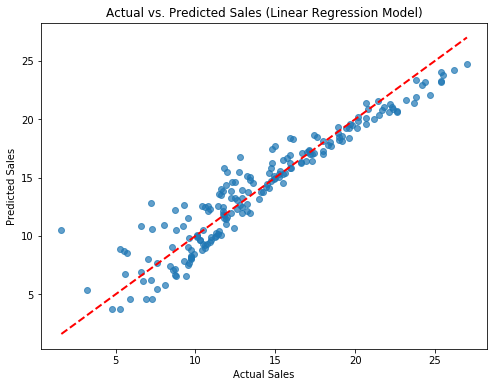

In [50]:
plt.figure(figsize=(8, 6))
y_pred_all = model.predict(X) # Predict on entire dataset for plot
plt.scatter(y, y_pred_all, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression Model)')
plt.show()

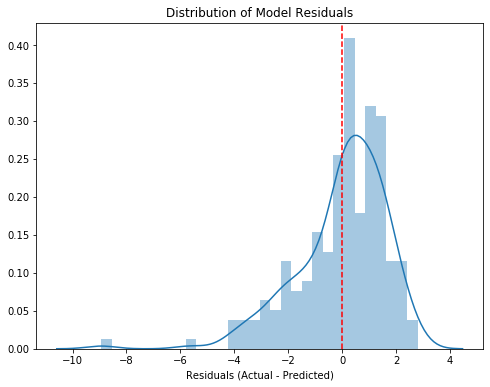

In [53]:
# 10. Residual Analysis (Check for model errors)
residuals = y - model.predict(X)
plt.figure(figsize=(8, 6))
sns.distplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Model Residuals')
plt.show()

In [54]:
print("MSE: ",mean_squared_error(y_test, Y_pred))
print("r2_score: ",r2_score(y_test, Y_pred))

MSE:  3.1740973539761037
r2_score:  0.899438024100912
